# Assignment  BDAT 1004 : Problem Set 3

# Question 1

Step 1. Import the necessary libraries Step 2. Import the dataset from this address. Step 3. Assign it to a variable called users Step 4. Discover what is the mean age per occupation Step 5. Discover the Male ratio per occupation and sort it from the most to the least Step 6. For each occupation, calculate the minimum and maximum ages Step 7. For each combination of occupation and sex, calculate the mean age Step 8. For each occupation present the percentage of women and men

In [30]:
#Step 1
import pandas as pd

#Step 2
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

#Step 3
users = pd.read_csv(url, sep='|')
print("======= STEP 3 ============\n")
print(users.head())  # Print the first 5 rows of the dataset
print("\n")


#Step 4
mean_age_by_occupation = users.groupby('occupation')['age'].mean().round(2)
print("======= STEP 4 - mean age per occupation ============\n")
print(mean_age_by_occupation)
print("\n")

#Step 5

# Count the number of males and females in each occupation
gender_counts_by_occupation = users.groupby('occupation')['gender'].value_counts()

# Calculate the male ratio for each occupation
male_ratio_by_occupation = (gender_counts_by_occupation.loc[:, 'M'] / gender_counts_by_occupation.groupby('occupation').sum()).round(2)

# Sort the male ratio in descending order
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)
print("======= STEP 5 Male ratio per occupation ============\n")
print(male_ratio_by_occupation)
print("\n")


#Step 6

# Calculate the minimum and maximum ages for each occupation
age_range_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("======= STEP 6 calculate the minimum and maximum ages ============\n")
print(age_range_by_occupation)
print("\n")


#Step 7

# Calculate the mean age for each combination of occupation and sex
mean_age_by_occupation_and_gender = (users.groupby(['occupation', 'gender'])['age'].mean()).round(2)
print("======= STEP 7 Calculate the mean age for each combination of occupation and sex ============\n")
print(mean_age_by_occupation_and_gender)
print("\n")


#Step 8

# Count the number of observations for each combination of occupation and gender
gender_counts_by_occupation = users.groupby(['occupation', 'gender']).size()

# Calculate the total number of observations for each occupation
total_counts_by_occupation = users.groupby('occupation').size()

# Calculate the percentage of women and men for each occupation
percentage_by_occupation_and_gender = (gender_counts_by_occupation / total_counts_by_occupation).mul(100).round(2)

# Add a '%' sign at the end of each percentage value
percentage_by_occupation_and_gender = percentage_by_occupation_and_gender.apply(lambda x: f"{x}%")

print("======= STEP 8 each occupation present the percentage of women and men ============\n")
print(percentage_by_occupation_and_gender)
print("\n")



======= STEP 3 ============

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


======= STEP 4 - mean age per occupation ============

occupation
administrator    38.75
artist           31.39
doctor           43.57
educator         42.01
engineer         36.39
entertainment    29.22
executive        38.72
healthcare       41.56
homemaker        32.57
lawyer           36.75
librarian        40.00
marketing        37.62
none             26.56
other            34.52
programmer       33.12
retired          63.07
salesman         35.67
scientist        35.55
student          22.08
technician       33.15
writer           36.31
Name: age, dtype: float64


======= STEP 5 Male ratio per occupation ============

occupation
doctor           1.00
engineer         0.97
technician       0

# Question 2

Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12 
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012? 
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards 
Step 9. Calculate the mean Yellow Cards given per Team

In [31]:
# Step 1
import pandas as pd

# Step 2 and 3
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Step 4
goals = euro12['Goals']
print(goals)
print("\n")
# Step 5
num_teams = euro12.shape[0]


# Step 6
num_cols = euro12.shape[1]

# Step 7
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])

# Step 9
mean_yellow_cards = discipline['Yellow Cards'].mean()

# Step 10
goals_more_than_6 = euro12[euro12["Goals"] > 6]

# Step 11
teams_starting_with_G = euro12[euro12["Team"].str.startswith("G")]

# Step 12
first_7_cols = euro12.iloc[:, :7]

# Step 13
all_cols_except_last_3 = euro12.iloc[:, :-3]

# Step 14
shooting_accuracy = euro12.loc[euro12["Team"].isin(["England", "Italy", "Russia"]), ["Team", "Shooting Accuracy"]]

# Print the results
print("======= EURO 2012 STATS ===========\n")
print(f"Number of teams participated in the Euro 2012: {num_teams}\n")
print(f"Number of columns in the dataset: {num_cols}\n")
print(f"Team, Yellow Cards, Red Cards\n{discipline}\n")
print("Teams sorted by Red Cards, then by Yellow Cards:\n")
print(discipline_sorted.to_string(index=False))
print("\n")
print(f"Mean Yellow Cards given per team: {mean_yellow_cards:.2f}\n")

print(f"Teams with more than 6 goals: {goals_more_than_6}\n")

print(f"Teams starting with letter 'G': {teams_starting_with_G}\n")

print(f"First 7 columns of the dataset:\n{first_7_cols}\n")

print(f"All columns of the dataset except last 3:\n{all_cols_except_last_3}\n")

print(f"Shooting accuracy of England, Italy, and Russia:\n{shooting_accuracy}\n")

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


======= EURO 2012 STATS ===========

Number of teams participated in the Euro 2012: 16

Number of columns in the dataset: 35

Team, Yellow Cards, Red Cards
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia            

# Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000 
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true? 
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [32]:
#Step 1
import pandas as pd
import numpy as np


#Step 2
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30000, size=100, dtype='l'))
print("======= STEP 2 - 3 differents Series ============\n")
print(s1, s2, s3)
print("\n")


#Step 3
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()



#Step 4
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housemkt.head()


#Step 5
# join concat the values
bigcolumn = pd.concat([s1, s2, s3], axis=0)

# it is still a Series, so we need to transform it to a DataFrame
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn


#Step 6
# no the index are kept but the length of the DataFrame is 300
len(bigcolumn)


#Step 7
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

======= STEP 2 - 3 differents Series ============

0     2
1     1
2     1
3     2
4     3
     ..
95    2
96    4
97    2
98    1
99    2
Length: 100, dtype: int32 0     2
1     3
2     1
3     3
4     3
     ..
95    1
96    3
97    3
98    2
99    2
Length: 100, dtype: int32 0     26316
1     12497
2     27623
3     22043
4     29095
      ...  
95    21843
96    11432
97    21907
98    24333
99    25878
Length: 100, dtype: int32


<class 'pandas.core.frame.DataFrame'>


,0
0,2
1,1
2,1
3,2
4,3
...,...
295,21843
296,11432
297,21907
298,24333


 # Question 4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN. 
Using pandas should make this exercise easier, in particular for the bonus question.

You should be able to perform all of these operations without using a for loop or 
other looping construct.

The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location. 
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location. 
Step 13. Downsample the record to a monthly frequency for each location. 
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [33]:
#Step 1
import pandas as pd
import datetime
import os


#Step 2 and 3
# Read the text file
data = pd.read_csv("wind.txt", sep="\s+", parse_dates=[[0, 1, 2]])

# Print the first few rows of the DataFrame
print(data.head())
print("step2")
print()
print(data)


#Step 4
# function that uses datetime
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# apply the function fix_century on the column and replace the values to the right ones
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

# data.info()
data.head()
print("step4")
print()
print(data)


#Step 5
# transform Yr_Mo_Dy it to date type datetime64
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

data.head()
# data.info()
print("step5")
print()
print(data)


#Step 6
# "Number of non-missing values for each location: "
data.isnull().sum()
print("step6")
print()
print(data)

#Step 7
#number of columns minus the number of missing values for each location
data.shape[0] - data.isnull().sum()
print("step7")
print()
print(data)



#Step 8
data.sum().sum() / data.notna().sum().sum()
print("step8")
print()
print(data)

#Step 9
data.describe(percentiles=[])
print("step9")
print()
print(data)


#Step 10
# create the dataframe
day_stats = pd.DataFrame()


# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()
print("step10")
print()
print(data)

#Step 11
data.loc[data.index.month == 1].mean()
print("step11")
print()
print(data)


#Step 12
data.groupby(data.index.to_period('A')).mean()
print("step12")
print()
print(data)


#Step 13
data.groupby(data.index.to_period('M')).mean()
print("step13")
print()
print(data)


#Step 14
data.groupby(data.index.to_period('W')).mean()
print("step14")
print()
print(data)


#Step 15

# resample data to 'W' week and use the functions
weekly = data.resample('W').agg(['min','max','mean','std'])

# slice it for the first 52 weeks and locations
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)
print("step4")
print()
print(data)

    Yr_Mo_Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0 2061-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1 2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2 2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3 2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4 2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  
step2

       Yr_Mo_Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0    2061-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1    2061-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2    2061-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3    2061-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   

#  Question 5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address. 
Step 3. Assign it to a variable called chipo. 
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset? 
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns. 
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column? 
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset? 
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order? 
Step 17. How many different items are sold?

In [34]:
import pandas as pd

# import tab separated dataset from address and assign is chipo
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep = "\t")

#see first 10 entries
print(chipo.head(10))

#number of observations in the dataset
numObs = chipo.shape[0]
print("Number of observations:", numObs)

#number of columns in dataset
numColumn = chipo.shape[1]
print("Number of columns:", numColumn)

#print all column names
print("Column names:", chipo.columns.tolist())

#indexing of the data
print("Index:", chipo.index)

#to find most ordered item. this calculates the frequency of each unique value in itemname column
#and counts how many times each item has been ordered. ".idxmax()" returns the index corresponding
#with the maximum value, here the most items ordered obtained from value_counts
commonI = chipo["item_name"].value_counts().idxmax()  
print("Most-ordered item:", commonI)

#to find how many of most ordered was ordered
quantity = chipo[chipo["item_name"] == commonI]["quantity"].sum()
print("Quantity ordered for most ordered item:", quantity)

#most ordered item in choice description column. calculates the frequency of each unique 
#value in the choice_description column and counts the number of times each choice description
#has been ordered. ".idxmax()" returns the index corresponding to the maximum value, here 
#it's the most items ordered from value_counts

commonChoice = chipo["choice_description"].value_counts().idxmax()
print("Most ordered choice description:", commonChoice)

#total number of items ordered
totalItems = chipo["quantity"].sum()
print("Total  items ordered:", totalItems)

#turn price item to float
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))
print("Item price type after conversion:", type(chipo["item_price"][0]))

#amount of revenue for the period in the dataset
revenue = (chipo["quantity"] * chipo["item_price"]).sum()
print("Total revenue:", revenue)

#number of orders made in the period
numOrders = chipo["order_id"].nunique()
print("Number of orders:", numOrders)

#average revenue amount per order
avgRev = revenue / numOrders
print("Average revenue per order:", avgRev)

#number of different items sold
diffItems = chipo["item_name"].nunique()
print("Number of different items sold:", diffItems)

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend. 
Don't forget to label your axes!

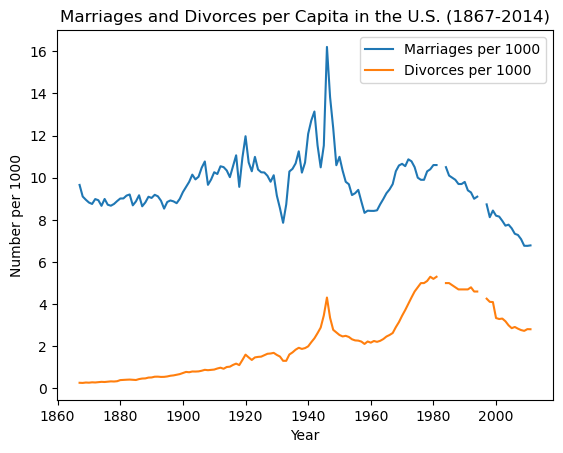

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

# Calculate the marriages and divorces per capita
data["Marriages_per_1000"] = data["Marriages"] / data["Population"] * 1000
data["Divorces_per_1000"] = data["Divorces"] / data["Population"] * 1000

# Create a line plot of the marriages and divorces per capita
plt.plot(data["Year"], data["Marriages_per_1000"], label="Marriages per 1000")
plt.plot(data["Year"], data["Divorces_per_1000"], label="Divorces per 1000")

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Number per 1000")
plt.title("Marriages and Divorces per Capita in the U.S. (1867-2014)")
plt.legend()

# Show the plot
plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

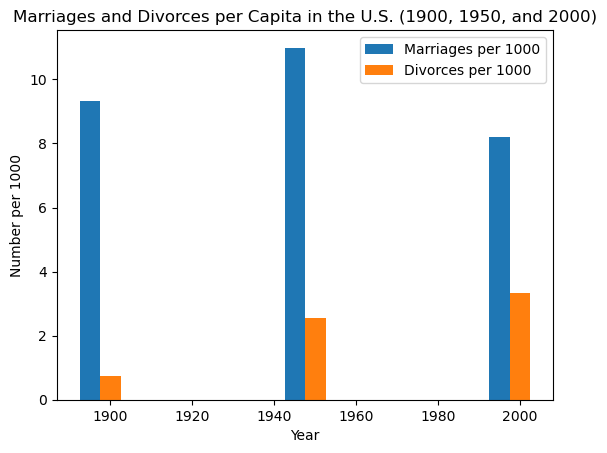

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

# Filter the data for the years 1900, 1950, and 2000
data = data[data["Year"].isin([1900, 1950, 2000])]

# Calculate the marriages and divorces per capita
data["Marriages_per_1000"] = data["Marriages"] / data["Population"] * 1000
data["Divorces_per_1000"] = data["Divorces"] / data["Population"] * 1000

# Create a vertical bar chart of the marriages and divorces per capita
plt.bar(data["Year"] - 5, data["Marriages_per_1000"], width=5, label="Marriages per 1000")
plt.bar(data["Year"], data["Divorces_per_1000"], width=5, label="Divorces per 1000")

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Number per 1000")
plt.title("Marriages and Divorces per Capita in the U.S. (1900, 1950, and 2000)")
plt.legend()

# Show the plot
plt.show()

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name. 
Don't forget to label your axes!

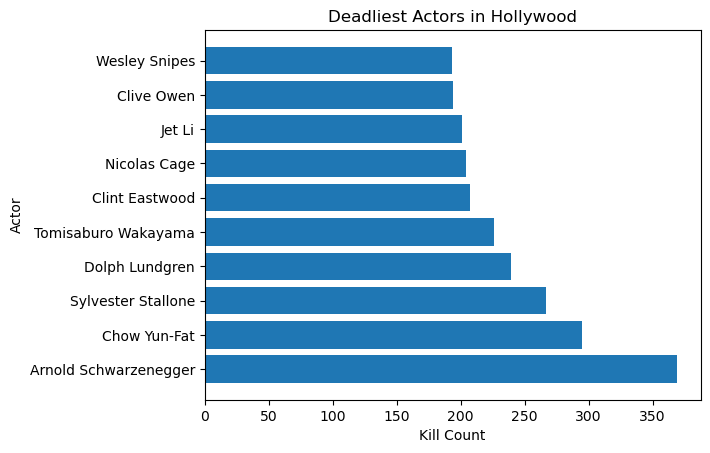

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("actor_kill_counts.csv")

# Sort the data by kill count
data = data.sort_values(by="Count", ascending=False)

# Create a horizontal bar chart of the actors and their kill counts
plt.barh(data["Actor"], data["Count"])

# Add labels and title
plt.xlabel("Kill Count")
plt.ylabel("Actor")
plt.title("Deadliest Actors in Hollywood")

# Show the plot
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

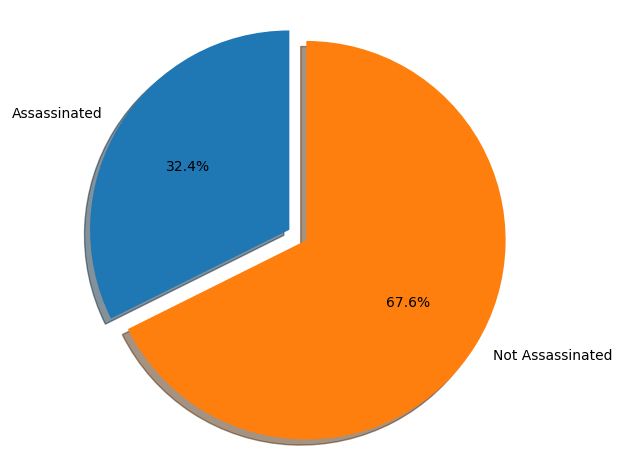

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('roman-emperor-reigns.csv')

assassinated = len(df[df['Cause_of_Death'] == 'Assassinated'])
total = len(df)

labels = 'Assassinated', 'Not Assassinated'
sizes = [assassinated/total, 1-(assassinated/total)]
explode = (0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.tight_layout()
plt.show()

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes! 
Color each dot according to its year.

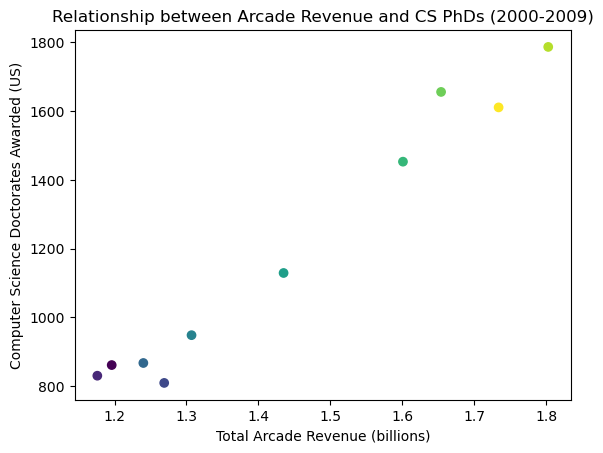

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Create a scatter plot of the arcade revenue and CS PhDs
plt.scatter(data["Total Arcade Revenue (billions)"], data["Computer Science Doctorates Awarded (US)"], c=data["Year"])

# Add labels and title
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")
plt.title("Relationship between Arcade Revenue and CS PhDs (2000-2009)")

# Show the plot
plt.show()